In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import pathlib
import matplotlib.pyplot as plt


In [12]:
# Importing Tensorflow
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


2.17.0


In [14]:
!pip install tensorflow-docs


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.5/182.5 kB 2.9 MB/s eta 0:00:00


In [15]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling


In [16]:
!pip install plotly
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go


In [17]:
dataset = pd.read_csv('final_data.csv')
dataset


,red,green,blue,label
0,20,139,240,Blue
1,174,83,72,Brown
2,144,249,131,Green
3,168,25,156,Pink
4,30,182,136,Green
...,...,...,...,...
5047,26,26,26,Black
5048,27,27,27,Black
5049,28,28,28,Black
5050,29,29,29,Black


In [18]:
dataset.describe()


,red,green,blue
count,5052.000000,5052.000000,5052.000000
mean,127.416073,126.316310,128.296912
std,73.958449,74.927131,74.174008
min,0.000000,0.000000,0.000000
25%,63.000000,60.000000,63.000000
50%,128.000000,127.000000,130.000000
75%,191.000000,192.000000,192.000000
max,255.000000,255.000000,255.000000


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5052 entries, 0 to 5051
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   red     5052 non-null   int64 
 1   green   5052 non-null   int64 
 2   blue    5052 non-null   int64 
 3   label   5052 non-null   object
dtypes: int64(3), object(1)
memory usage: 158.0+ KB


In [20]:
dataset.isnull().sum()

,0
red,0
green,0
blue,0
label,0


In [21]:
dataset.label.unique()

array(['Blue', 'Brown', 'Green', 'Pink', 'Yellow', 'Orange', 'Purple',
       'Red', 'Grey', 'White', 'Black'], dtype=object)

In [22]:
# One-Hot-Encoding
dataset = pd.get_dummies(dataset, columns=['label'])
dataset

,red,green,blue,label_Black,label_Blue,label_Brown,label_Green,label_Grey,label_Orange,label_Pink,label_Purple,label_Red,label_White,label_Yellow
0,20,139,240,False,True,False,False,False,False,False,False,False,False,False
1,174,83,72,False,False,True,False,False,False,False,False,False,False,False
2,144,249,131,False,False,False,True,False,False,False,False,False,False,False
3,168,25,156,False,False,False,False,False,False,True,False,False,False,False
4,30,182,136,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,26,26,26,True,False,False,False,False,False,False,False,False,False,False
5048,27,27,27,True,False,False,False,False,False,False,False,False,False,False
5049,28,28,28,True,False,False,False,False,False,False,False,False,False,False
5050,29,29,29,True,False,False,False,False,False,False,False,False,False,False


In [23]:
dataset = dataset[['red', 'green', 'blue', 'label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]
dataset


,red,green,blue,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
0,20,139,240,False,False,True,False,False,False,False,False,False,False,False
1,174,83,72,False,False,False,False,False,False,False,True,False,False,False
2,144,249,131,False,True,False,False,False,False,False,False,False,False,False
3,168,25,156,False,False,False,False,False,True,False,False,False,False,False
4,30,182,136,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,26,26,26,False,False,False,False,False,False,False,False,False,True,False
5048,27,27,27,False,False,False,False,False,False,False,False,False,True,False
5049,28,28,28,False,False,False,False,False,False,False,False,False,True,False
5050,29,29,29,False,False,False,False,False,False,False,False,False,True,False


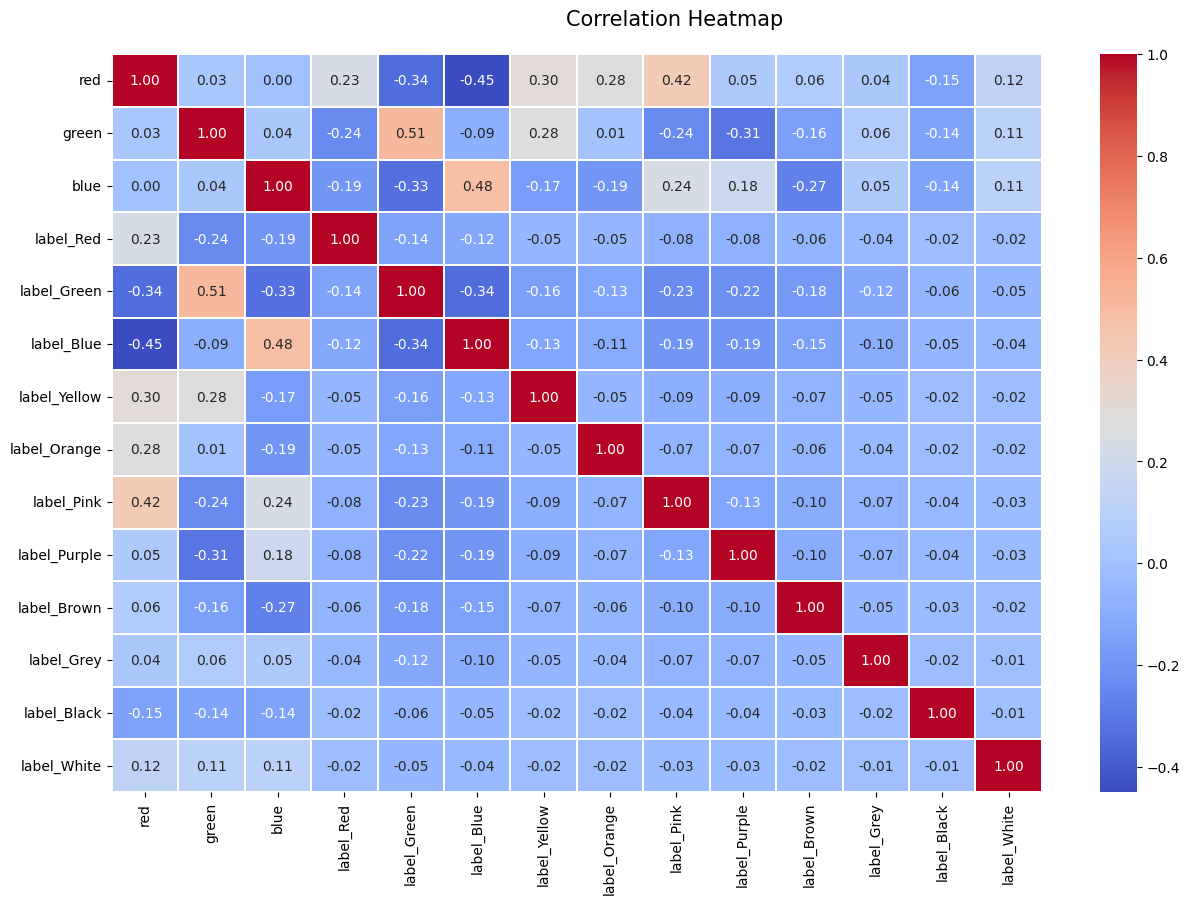

In [24]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 9))
corr = dataset.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=15)

In [25]:
train_dataset = dataset.sample(frac=0.8, random_state=9) #train = 80%,  random_state = any int value means every time when you run your program you will get the same output for train and test dataset, random_state is None by default which means every time when you run your program you will get different output because of splitting between train and test varies within
test_dataset = dataset.drop(train_dataset.index) #remove train_dataset from dataframe to get test_dataset
train_dataset

test_dataset


,red,green,blue,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
0,20,139,240,False,False,True,False,False,False,False,False,False,False,False
1,174,83,72,False,False,False,False,False,False,False,True,False,False,False
3,168,25,156,False,False,False,False,False,True,False,False,False,False,False
11,249,99,108,False,False,False,False,False,True,False,False,False,False,False
12,24,161,177,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,18,18,18,False,False,False,False,False,False,False,False,False,True,False
5040,19,19,19,False,False,False,False,False,False,False,False,False,True,False
5042,21,21,21,False,False,False,False,False,False,False,False,False,True,False
5048,27,27,27,False,False,False,False,False,False,False,False,False,True,False


In [26]:
train_labels = pd.DataFrame([train_dataset.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T
train_labels

train_dataset

test_labels = pd.DataFrame([test_dataset.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T
test_labels

test_dataset

,red,green,blue
0,20,139,240
1,174,83,72
3,168,25,156
11,249,99,108
12,24,161,177
...,...,...,...
5039,18,18,18
5040,19,19,19
5042,21,21,21
5048,27,27,27


In [27]:
from keras import regularizers
model = keras.Sequential([
    layers.Dense(3, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=[len(train_dataset.keys())]), #inputshape=[3]
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(11)
  ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [28]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 11)                  │             275 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 383 (1.50 KB)

 Trainable params: 383 (1.50 KB)

 Non-trainable params: 0 (0.00 B)


Epoch: 0, accuracy:0.0859,  loss:13.2649,  val_accuracy:0.1105,  val_loss:6.1295,  
....................................................................................................
Epoch: 100, accuracy:0.8197,  loss:0.4955,  val_accuracy:0.7865,  val_loss:0.5604,  
....................................................................................................
Epoch: 200, accuracy:0.8416,  loss:0.4031,  val_accuracy:0.8343,  val_loss:0.4421,  
....................................................................................................
Epoch: 300, accuracy:0.8537,  loss:0.3756,  val_accuracy:0.8392,  val_loss:0.4237,  
....................................................................................................
Epoch: 400, accuracy:0.8586,  loss:0.3555,  val_accuracy:0.8302,  val_loss:0.4178,  
....................................................................................................
Epoch: 500, accuracy:0.8674,  loss:0.3463,  val_accuracy:0.8491,  val_

Text(0, 0.5, 'loss [Color]')

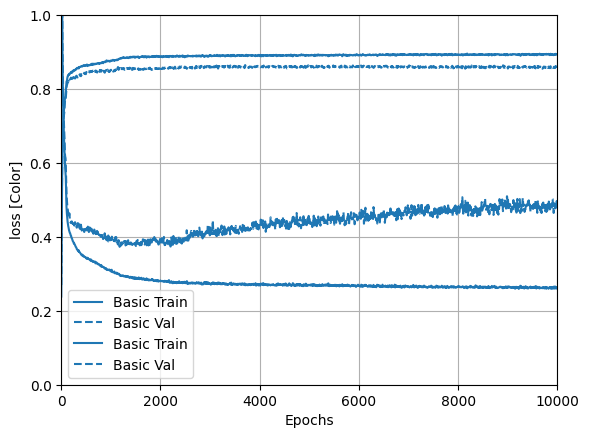

In [29]:
history = model.fit(x=train_dataset, y=train_labels,
                    validation_split=0.3,
                    epochs=10001,
                    batch_size=48,
                    verbose=0,
                    callbacks=[tfdocs.modeling.EpochDots()],
                    shuffle=True)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = "accuracy")
plt.ylim([0, 1])
plt.ylabel('accuracy [Color]')

plotter.plot({'Basic': history}, metric = "loss")
plt.ylim([0, 1])
plt.ylabel('loss [Color]')


In [30]:
#Install PyDrive library into Google Colab notebook
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [31]:
#Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [32]:
!pip install pyyaml h5py

In [33]:
model.save('colormodel_acu_89.h5')
model_file = drive.CreateFile({'title' : 'colormodel_acu_89.h5'}) # colormodel_acu_  .h5 is the name of the model uploaded to Drive
model_file.SetContentFile('colormodel_acu_89.h5')
model_file.Upload()

In [35]:
file_list = drive.ListFile({'q': "title contains 'colormodel_acu_89.h5'"}).GetList()
for file in file_list:
    print(f'Title: {file["title"]}, ID: {file["id"]}')


Title: colormodel_acu_89.h5, ID: 1O9cCX6HRq7XpY5FXi6dnwNzP92tpTqQs


In [36]:
# Save the model again
model.save('colormodel_acu_89.h5')
model_file = drive.CreateFile({'title': 'colormodel_acu_89.h5'})
model_file.SetContentFile('colormodel_acu_89.h5')
model_file.Upload()

# Print the new file ID
print(f'New file ID: {model_file.get("id")}')


New file ID: 192mgG8t37yXYsApGt_abkz8aytbxDAwd


In [38]:
# download to google drive
drive.CreateFile({'id': model_file.get('id')}) ### very important to run this last cell for loading the model in new notebook


GoogleDriveFile({'id': '192mgG8t37yXYsApGt_abkz8aytbxDAwd'})

In [41]:
# Load the model from Google Drive into Colab
file_obj = drive.CreateFile({'id': '192mgG8t37yXYsApGt_abkz8aytbxDAwd'})  # Ensure the ID is correct and properly formatted
file_obj.GetContentFile('colormodel_trained_89.h5')  # Name of the model file to be used in Colab


In [42]:
ls

colormodel_acu_89.h5  colormodel_trained_89.h5  final_data.csv  sample_data/  train.csv


In [43]:
# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model('colormodel_trained_89.h5') #very important


In [44]:
# Show the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 11)                  │             275 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 385 (1.51 KB)

 Trainable params: 383 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [45]:
train_predictions = model.predict(train_dataset)
train_predictions


127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[   9.483871 ,  -15.94918  ,  -17.0108   , ...,  -24.243698 ,
         -15.166104 ,  -89.38018  ],
       [ -31.201372 ,   -9.882561 ,  -69.87572  , ...,  -29.881554 ,
        -268.52365  ,  -78.994446 ],
       [-104.63175  ,   -5.4289174,  -28.458643 , ...,   -4.6332026,
        -192.52272  ,  -60.35481  ],
       ...,
       [-163.16295  ,   -8.591763 ,    9.284971 , ...,    6.2475405,
         -67.81977  ,  -44.143314 ],
       [-527.86584  ,    1.8403337,    8.012345 , ...,   -3.4046965,
         -63.979553 , -128.7392   ],
       [-601.3561   ,    2.7173276,    5.156562 , ...,    1.1111305,
        -470.82678  , -120.87657  ]], dtype=float32)

In [46]:
actual_encoded_train_labels = np.argmax(train_labels.to_numpy(), axis=1) #train_labels were originally in one-hot
actual_encoded_train_labels

predicted_encoded_train_labels = np.argmax(train_predictions, axis=1)
predicted_encoded_train_labels


array([5, 4, 7, ..., 6, 2, 2])

In [47]:
actual_encoded_train_labels = pd.DataFrame(actual_encoded_train_labels, columns=['Labels'])
actual_encoded_train_labels

predicted_encoded_train_labels = pd.DataFrame(predicted_encoded_train_labels, columns=['Labels'])
predicted_encoded_train_labels


,Labels
0,5
1,4
2,7
3,1
4,3
...,...
4037,2
4038,6
4039,6
4040,2


In [48]:
#Plot Actual vs Predicted Class for Training Dataset
actual_chart = go.Scatter(x=actual_encoded_train_labels.index, y=actual_encoded_train_labels.Labels, name= 'Actual Label')
predict_chart = go.Scatter(x=actual_encoded_train_labels.index, y=predicted_encoded_train_labels.Labels, name= 'Predicted Label')
py.iplot([predict_chart, actual_chart])


In [49]:
test_predictions = model.predict(test_dataset)
test_predictions

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[-5.2786584e+02,  1.8403337e+00,  8.0123453e+00, ...,
        -3.4046965e+00, -6.3979553e+01, -1.2873920e+02],
       [ 2.9235435e-01, -1.0261149e+01, -3.3271500e+01, ...,
        -1.5552071e+01, -1.3899052e+02, -5.1251678e+01],
       [ 4.6326671e+00, -1.3958107e+01, -3.9438858e+00, ...,
        -8.3922443e+00, -1.0961428e+00, -7.3818985e+01],
       ...,
       [-3.5372522e+02, -5.0304637e+00, -8.8080502e+00, ...,
        -4.8043814e+00,  1.6337852e+01, -1.4944641e+02],
       [-3.4632507e+02, -5.2944026e+00, -8.4945030e+00, ...,
        -3.5483475e+00,  1.0479967e+01, -1.4290184e+02],
       [-3.4509164e+02, -5.3383937e+00, -8.4422426e+00, ...,
        -3.3390036e+00,  9.5036602e+00, -1.4181108e+02]], dtype=float32)

In [50]:
actual_encoded_test_labels = np.argmax(test_labels.to_numpy(), axis=1)
actual_encoded_test_labels

predicted_encoded_test_labels = np.argmax(test_predictions, axis=1)
predicted_encoded_test_labels

array([2, 7, 6, ..., 9, 9, 9])

In [51]:
actual_encoded_test_labels = pd.DataFrame(actual_encoded_test_labels, columns=['Labels'])
actual_encoded_test_labels

predicted_encoded_test_labels = pd.DataFrame(predicted_encoded_test_labels, columns=['Labels'])
predicted_encoded_test_labels


,Labels
0,2
1,7
2,6
3,0
4,2
...,...
1005,9
1006,9
1007,9
1008,9


In [52]:
#Plot Actual vs Predicted Class for Test Dataset
actual_chart = go.Scatter(x=actual_encoded_test_labels.index, y=actual_encoded_test_labels.Labels, name= 'Actual Label')
predict_chart = go.Scatter(x=actual_encoded_test_labels.index, y=predicted_encoded_test_labels.Labels, name= 'Predicted Label')
py.iplot([predict_chart, actual_chart])



127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8878 - loss: 0.2666


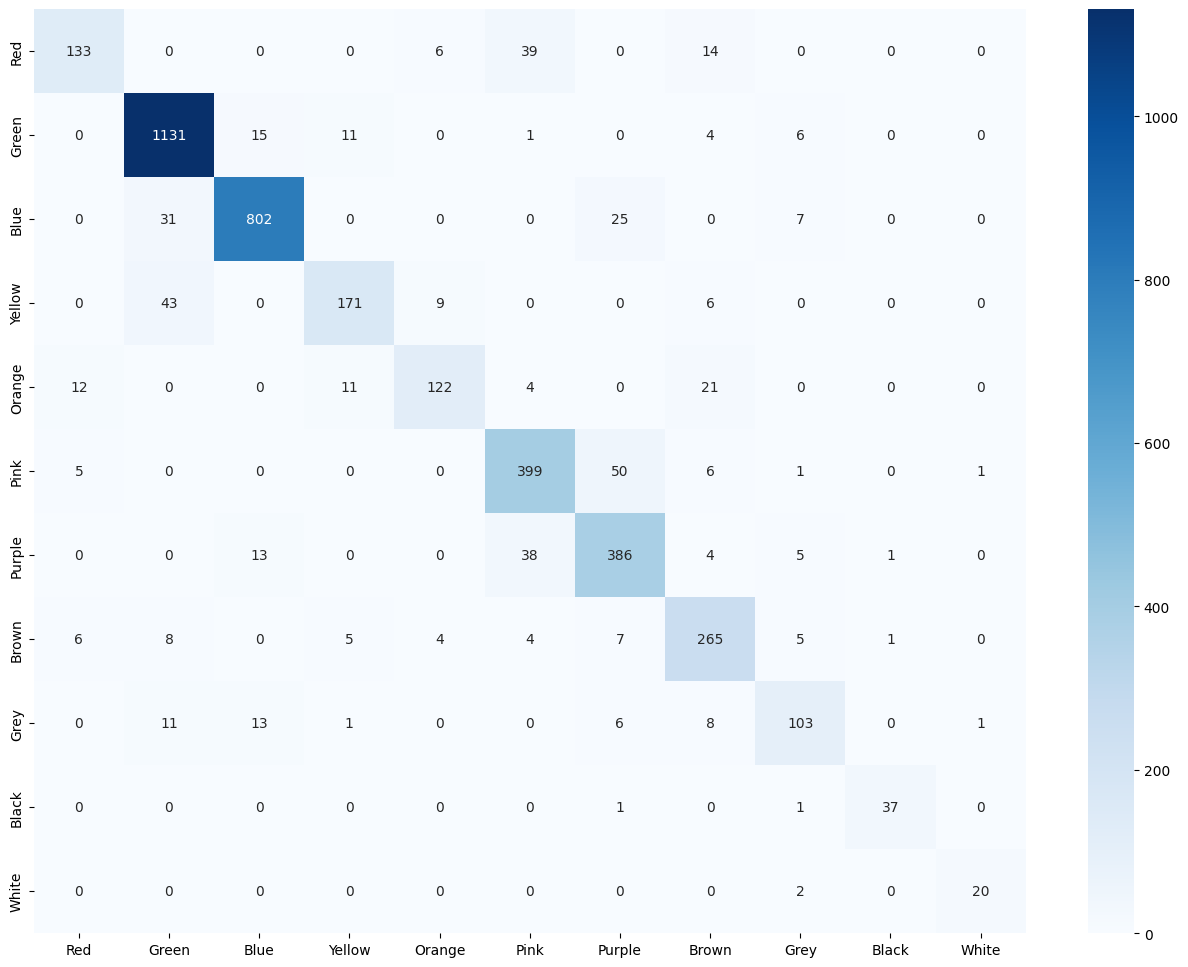

In [53]:
model.evaluate(x=train_dataset, y=train_labels)

from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix_train = confusion_matrix(actual_encoded_train_labels, predicted_encoded_train_labels)
confusion_matrix_train

f,ax = plt.subplots(figsize=(16,12))
categories = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
sns.heatmap(confusion_matrix_train, annot=True, cmap='Blues', fmt='d',
            xticklabels = categories,
            yticklabels = categories)
plt.show()


              precision    recall  f1-score   support

         Red       0.85      0.69      0.76       192
       Green       0.92      0.97      0.95      1168
        Blue       0.95      0.93      0.94       865
      Yellow       0.86      0.75      0.80       229
      Orange       0.87      0.72      0.78       170
        Pink       0.82      0.86      0.84       462
      Purple       0.81      0.86      0.84       447
       Brown       0.81      0.87      0.84       305
        Grey       0.79      0.72      0.75       143
       Black       0.95      0.95      0.95        39
       White       0.91      0.91      0.91        22

    accuracy                           0.88      4042
   macro avg       0.87      0.84      0.85      4042
weighted avg       0.88      0.88      0.88      4042

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8927 - loss: 0.4387


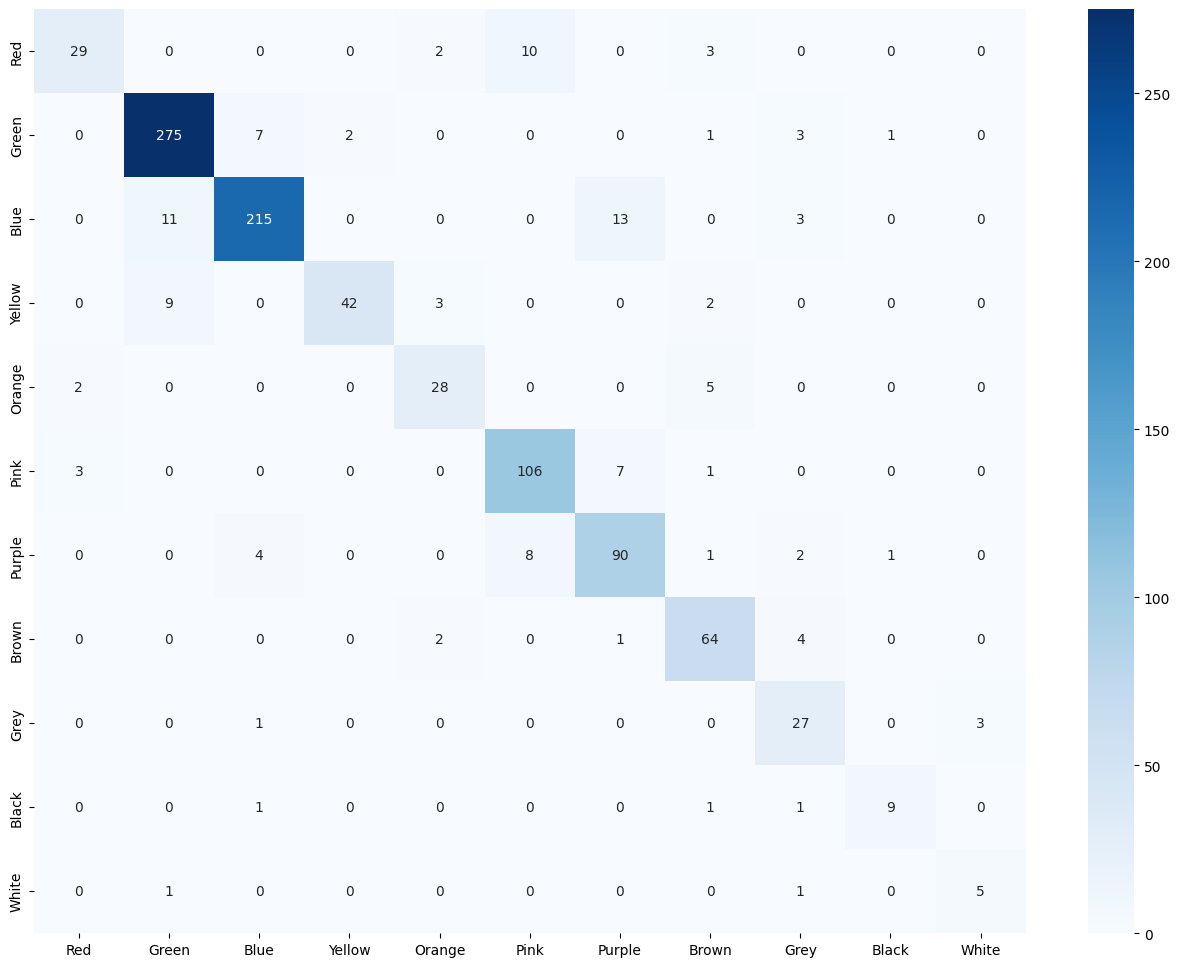

In [54]:
target_names = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
print(classification_report(actual_encoded_train_labels, predicted_encoded_train_labels, target_names=target_names))

"""## Evaluating for Test Dataset"""

model.evaluate(x=test_dataset, y=test_labels)

confusion_matrix_test = confusion_matrix(actual_encoded_test_labels, predicted_encoded_test_labels)
confusion_matrix_test

f,ax = plt.subplots(figsize=(16,12))
categories = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
sns.heatmap(confusion_matrix_test, annot=True, cmap='Blues', fmt='d',
            xticklabels = categories,
            yticklabels = categories)
plt.show()

In [55]:
target_names = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
print(classification_report(actual_encoded_test_labels, predicted_encoded_test_labels, target_names=target_names))

              precision    recall  f1-score   support

         Red       0.85      0.66      0.74        44
       Green       0.93      0.95      0.94       289
        Blue       0.94      0.89      0.91       242
      Yellow       0.95      0.75      0.84        56
      Orange       0.80      0.80      0.80        35
        Pink       0.85      0.91      0.88       117
      Purple       0.81      0.85      0.83       106
       Brown       0.82      0.90      0.86        71
        Grey       0.66      0.87      0.75        31
       Black       0.82      0.75      0.78        12
       White       0.62      0.71      0.67         7

    accuracy                           0.88      1010
   macro avg       0.82      0.82      0.82      1010
weighted avg       0.89      0.88      0.88      1010

